In [7]:
#This is Davide's code for the RK activity

In [8]:
#first of all I import all the libraries that I need
# and set matplotlib to interactive plotting
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib notebook

In [9]:
dx=.001
xmax=10.   # This is the max value of x
x0=0  # this is my starting point
xe=np.arange(x0,xmax+dx/2,dx)
y0=1. # this is my initial condition
yAnalitic=np.exp(xe**2/2)/np.exp(x0**2/2)

In [10]:
# Euler method. Note the time checks t1 and t2
t1=time.time()
yEuler=np.zeros(xe.size)
yEuler[0]=y0
for i in range(0,xe.size-1):
    yEuler[i+1]=yEuler[i]+yEuler[i]*xe[i]*dx
t2=time.time()

In [11]:
# RK2 method. I could have defined a python function for f(x,y)=xy
# but this diff eq is very simple and I can code it directly in the 
# for loop. I am changing dx to get solutions of comparable accuracy
# with the three methods
t3a=time.time()
dx=0.03
x2=np.arange(x0,xmax+dx/2,dx)
yRK2=np.zeros(x2.size)
yRK2[0]=y0
for i in range(0,x2.size-1):
    k1=dx*yRK2[i]*x2[i]
    k2=dx*(yRK2[i]+k1)*(x2[i]+dx)
    yRK2[i+1]=yRK2[i]+0.5*(k1+k2)
t3=time.time()

In [12]:
# RK4.
t4a=time.time()
dx=0.2
x4=np.arange(x0,xmax+dx/2,dx)
dx=x4[1]-x4[0]
yRK4=np.zeros(x4.size)
yRK4[0]=y0
for i in range(0,x4.size-1):
    k1=dx*yRK4[i]*x4[i]
    k2=dx*(yRK4[i]+k1/2)*(x4[i]+dx/2)
    k3=dx*(yRK4[i]+k2/2)*(x4[i]+dx/2)
    k4=dx*(yRK4[i]+k3)*(x4[i]+dx)
    yRK4[i+1]=yRK4[i]+(k1+2*k2+2*k3+k4)/6
t4=time.time()

<IPython.core.display.Javascript object>


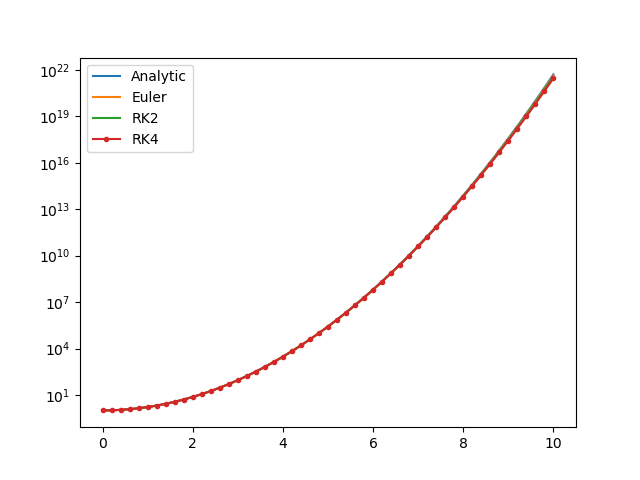

In [13]:
# here I am plotting the various results
plt.semilogy(xe,yAnalitic,label='Analytic')
plt.plot(xe,yEuler,label='Euler')
plt.plot(x2,yRK2,label='RK2')
plt.plot(x4,yRK4,label='RK4',ls='-',marker='.')
plt.legend()

In [14]:
# Finally, I compare the time taken by the various methods.
print('The time to run Euler was:',t2-t1)
print('The time to run RK2   was:',t3-t3a)
print('The time to run RK4   was:',t4-t4a)

The time to run Euler was: 0.007853984832763672
The time to run RK2   was: 0.0007376670837402344
The time to run RK4   was: 0.0004899501800537109
